In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
sns.set(rc = {"figure.figsize":(12,10)})

# Data loading

In [3]:
data = pd.read_csv('titanic_data.csv')

In [4]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### types of features
###### categorical - sex,embarked
###### continuous - age,fare
###### discrete - sibsp, parch 
###### alphanumeric - cabin


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical value analysis

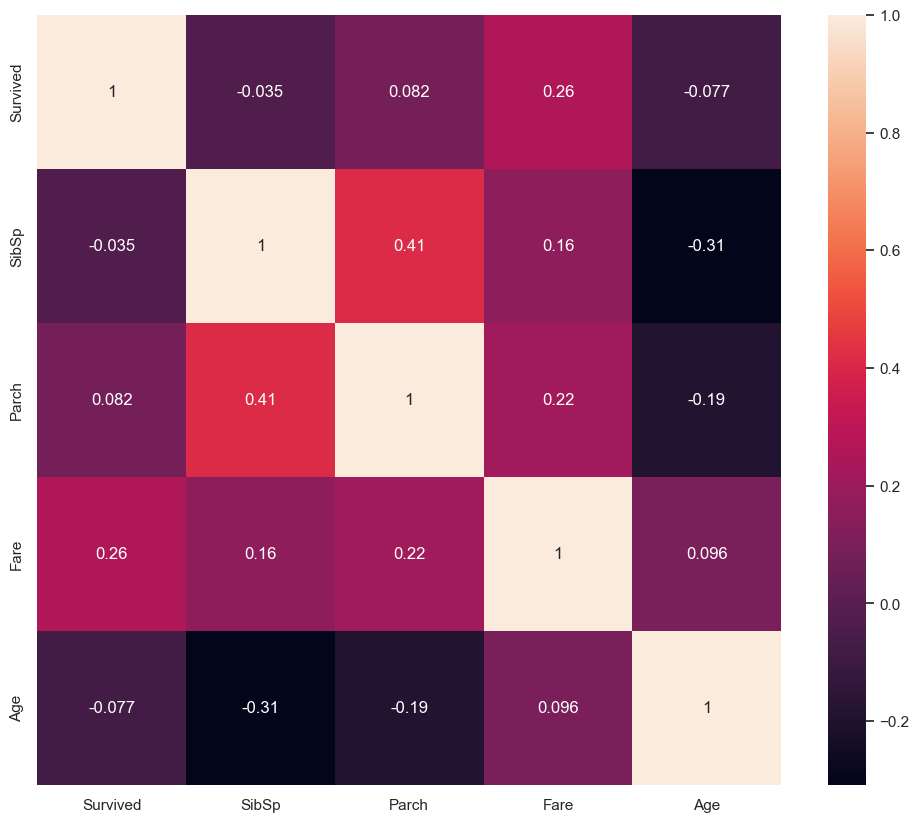

In [10]:
plt.figure(figsize = (12,10))
heatmap = sns.heatmap(data[["Survived","SibSp","Parch","Fare","Age"]].corr(),annot = True)  # corr is used to relate it to itself and annot is true to print the values in the plot

In [11]:
data['SibSp'].nunique()

7

In [12]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

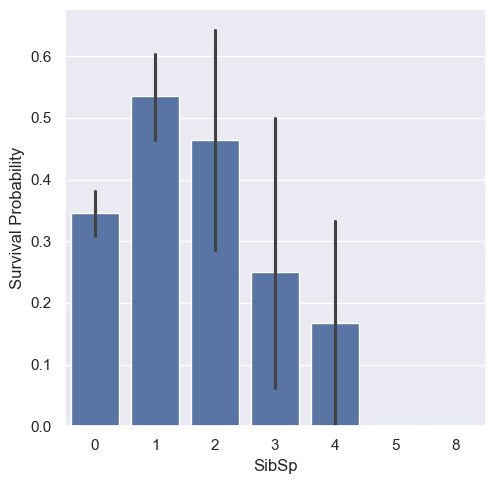

In [13]:
sns.catplot(x = "SibSp", y = "Survived",data = data, kind= "bar").set_ylabels("Survival Probability")

# Survival Probability wrt Age

C:\Users\Adhiraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Adhiraj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


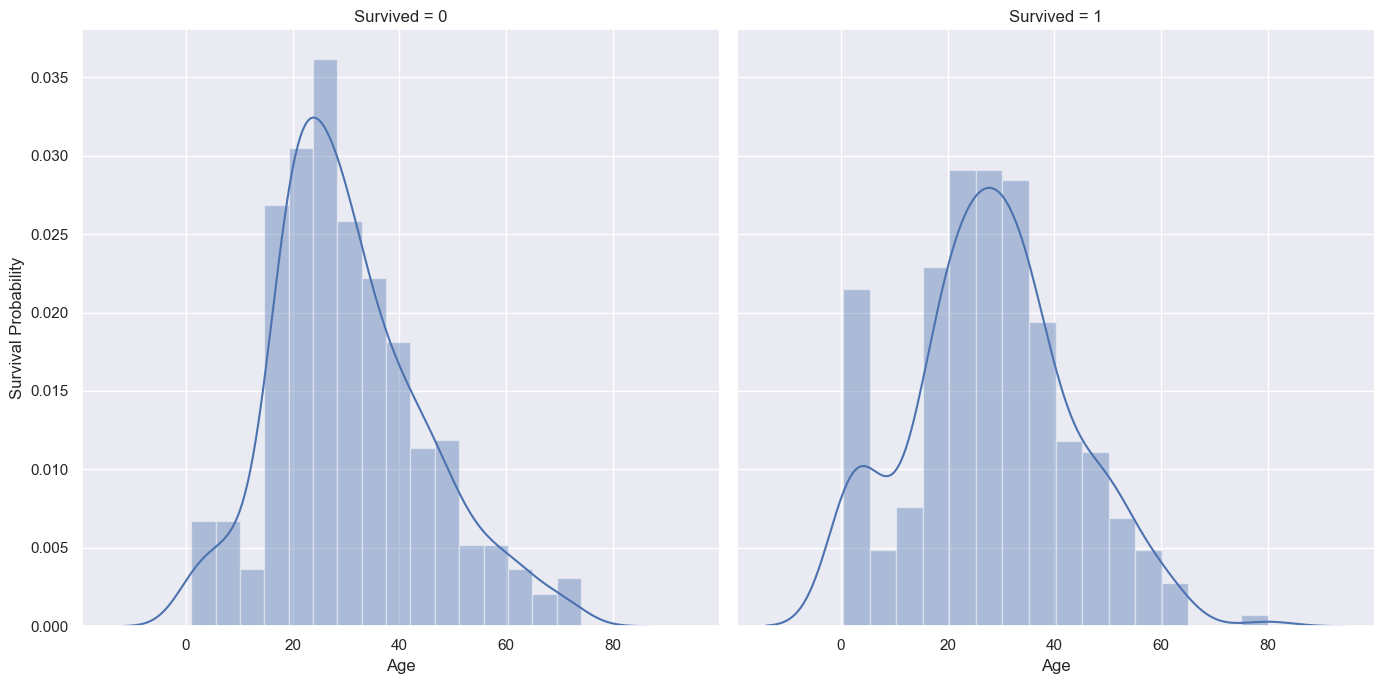

In [15]:
age_visual = sns.FacetGrid(data,col = "Survived",height =7)
age_visual = age_visual.map(sns.distplot,"Age").set_ylabels("Survival Probability")

# Looking for survival prob wrt gender

In [17]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


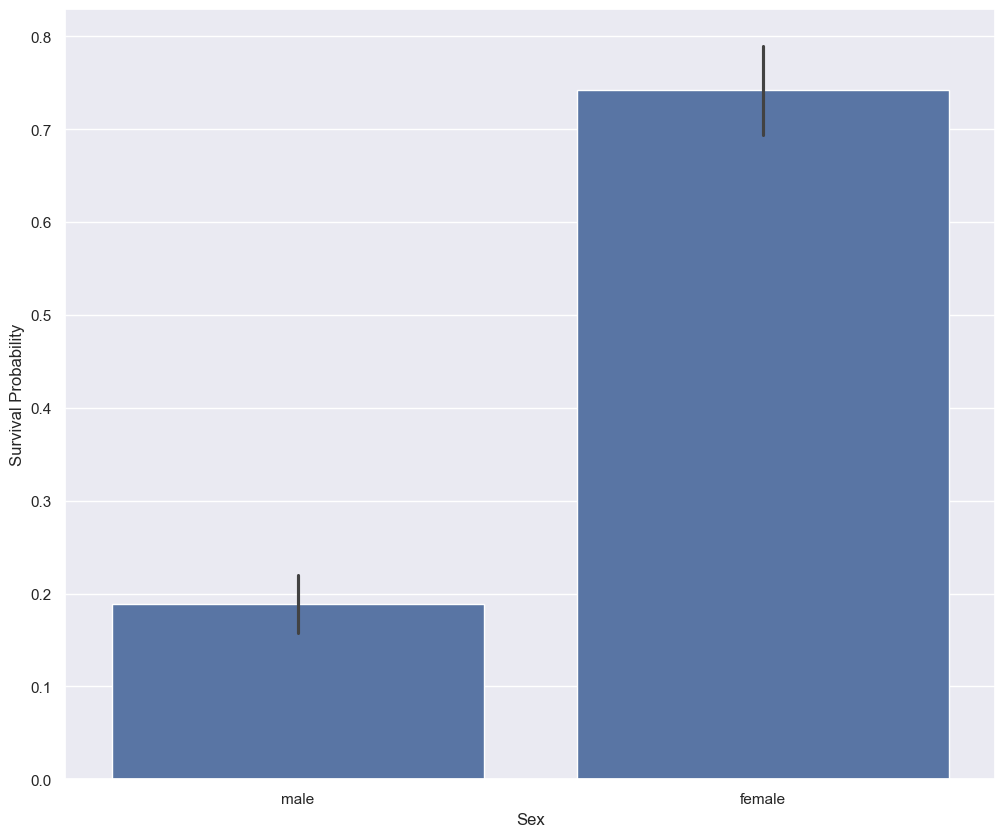

In [18]:
sex_plot = sns.barplot(x="Sex", y = "Survived",data = data).set_ylabel("Survival Probability")

# Survival based on Pclass

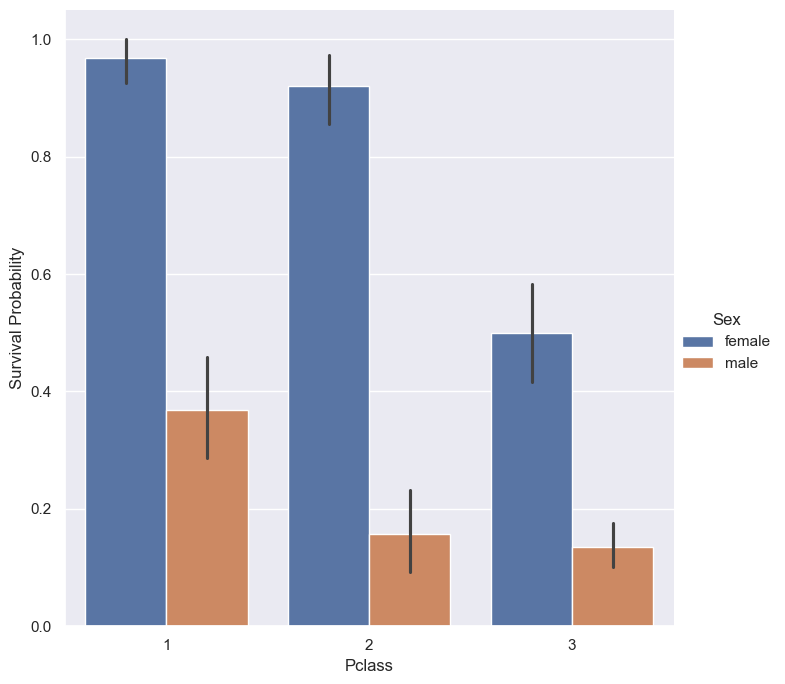

In [20]:
pclass = sns.catplot(x = "Pclass", y = "Survived", data = data,kind = "bar", height =7,hue = "Sex")
pclass =pclass.set_ylabels("Survival Probability")

**passenger from class 1 have higher chance of survival** 

# Embarked

In [23]:
data["Embarked"].isnull().sum()

2

In [24]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
data["Embarked"] = data["Embarked"].fillna("S")

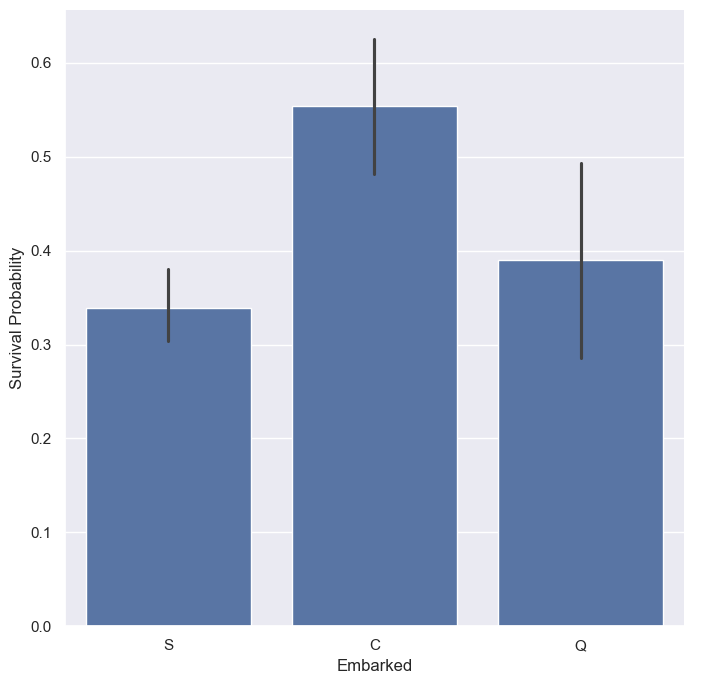

In [26]:
g = sns.catplot(x = "Embarked", y = "Survived", data = data ,kind ="bar", height=7)
g.set_ylabels("Survival Probability")

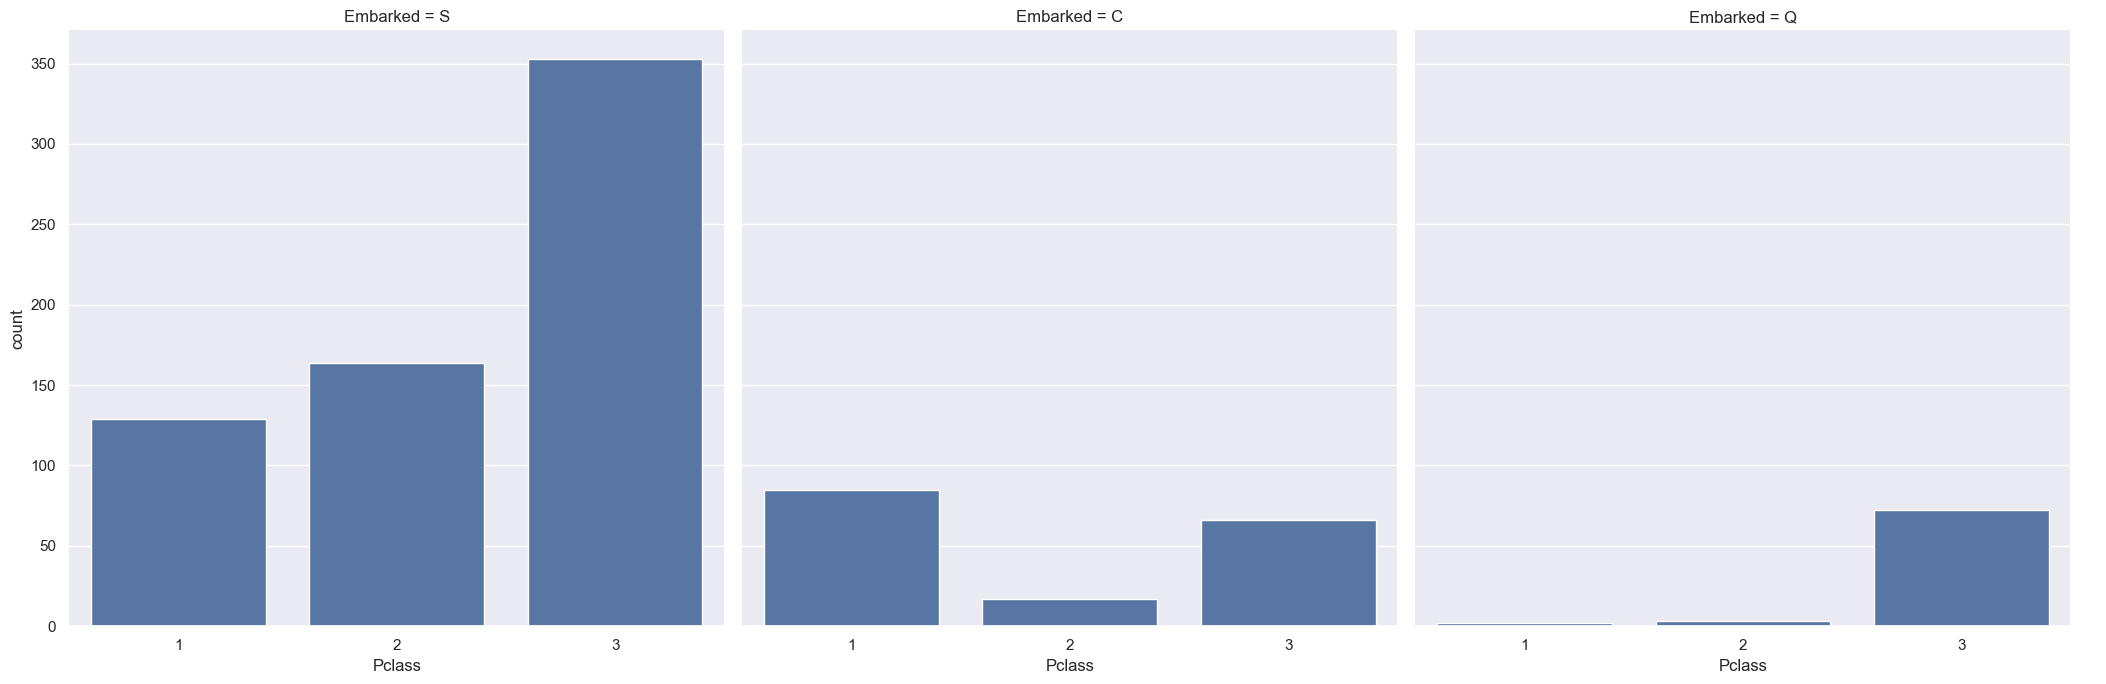

In [27]:
# Exploring Pclass vs Embarked
g = sns.catplot(x="Pclass", col ="Embarked",data=data,height =7, kind= "count")
g.despine(left = True)
g = g.set_ylabels("count")

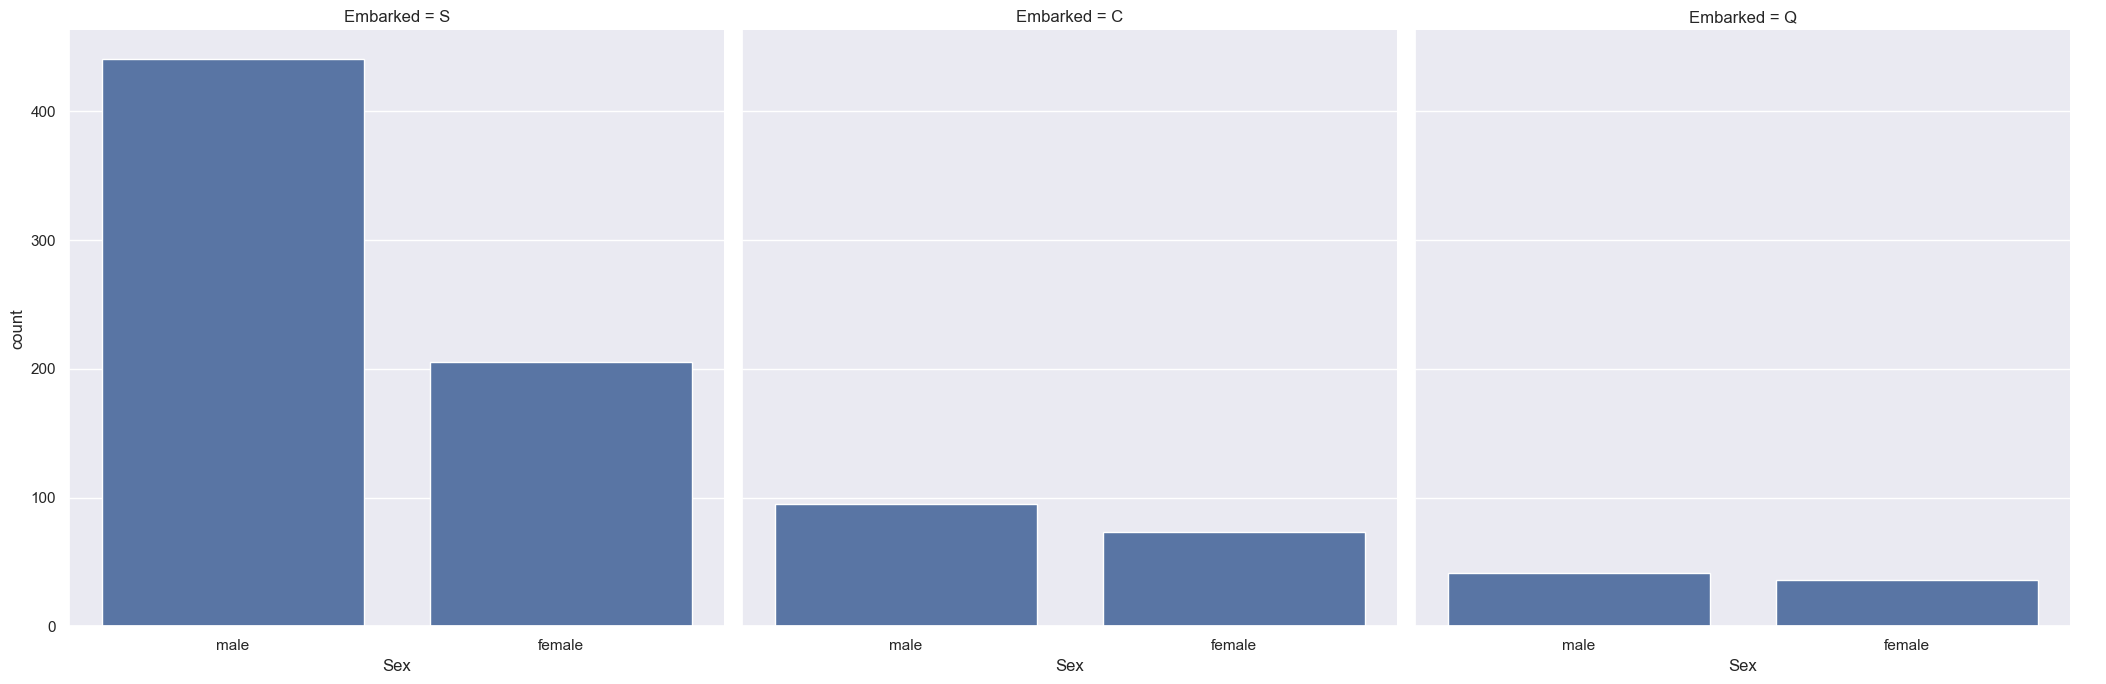

In [28]:
g = sns.catplot(x = "Sex", col = "Embarked", data = data, height =7, kind= "count")

we can see from the above analysis that Southamtop has more male passengers and even they are from Pclass = 3 hence there survival chances are very less compared to C

# Data preparing 

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [34]:
mean = data["Age"].mean()

In [35]:
std = data["Age"].std()
isnull = data["Age"].isnull().sum()

In [36]:
print(mean,std,isnull)

29.69911764705882 14.526497332334044 177


In [37]:
rand_age = np.random.randint(mean-std,mean+std, size = isnull) # as most of the values in a gaussian curve surrounds this range

In [38]:
rand_age 

array([38, 38, 29, 34, 38, 40, 40, 17, 43, 30, 24, 42, 39, 40, 34, 27, 22,
       16, 24, 30, 39, 35, 31, 26, 20, 36, 17, 23, 22, 42, 43, 25, 23, 34,
       37, 33, 22, 23, 35, 41, 25, 43, 32, 27, 36, 27, 36, 32, 17, 16, 22,
       37, 27, 40, 22, 27, 39, 21, 21, 21, 39, 33, 18, 34, 30, 23, 23, 31,
       33, 32, 20, 15, 40, 23, 29, 42, 29, 26, 29, 16, 39, 31, 41, 15, 27,
       17, 37, 43, 23, 22, 17, 16, 22, 35, 39, 33, 39, 41, 15, 27, 17, 24,
       38, 25, 23, 42, 16, 22, 32, 21, 32, 23, 23, 37, 31, 27, 29, 38, 15,
       21, 30, 16, 43, 40, 16, 29, 43, 16, 31, 37, 43, 22, 31, 36, 28, 20,
       16, 23, 24, 37, 36, 37, 34, 20, 18, 34, 35, 42, 16, 30, 37, 39, 17,
       34, 21, 34, 40, 33, 15, 17, 33, 19, 37, 17, 35, 29, 23, 20, 15, 17,
       28, 32, 24, 25, 31, 24, 30])

In [39]:
type(rand_age)

numpy.ndarray

In [40]:
a = data["Age"].copy()

In [41]:
np.isnan(a)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [42]:
a[np.isnan(a)] = rand_age
data["Age"]=a

In [43]:
data["Age"].isnull().sum()

0

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


dropping parameters that are not essential

In [46]:
col_to_drop = ['PassengerId','Cabin','Ticket','Name']
data.drop(col_to_drop, axis = 1 ,inplace = True)

In [47]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [48]:
genders = {"male":0, "female":1}
data["Sex"] = data["Sex"].map(genders)  # we can not have categorical features to train the model 

In [56]:
ports = {"S":0,"C":1,"Q":2}
data["Embarked"]= data["Embarked"].map(ports)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [60]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splitting the data for training

In [63]:
x = data.drop(data.columns[0],axis =1)
y = data["Survived"]

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.30, random_state =0)

# Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc_x =  StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest  = sc_x.fit_transform(xtest)

# CLssification 

In [73]:
log_reg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators =100)

In [75]:
log_reg.fit(xtrain,ytrain)
svc_classifier.fit(xtrain,ytrain)
dt_classifier.fit(xtrain,ytrain)
knn_classifier.fit(xtrain,ytrain)
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier()

In [77]:
log_reg_ypred = log_reg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [83]:
from sklearn.metrics import accuracy_score

log_reg_acc = accuracy_score(ytest, log_reg_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_clasifier_acc = accuracy_score(ytest, knn_classifier_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [85]:
print(log_reg_acc ,dt_classifier_acc,knn_clasifier_acc,svc_classifier_acc , rf_classifier_acc)

0.8134328358208955 0.7686567164179104 0.8097014925373134 0.8134328358208955 0.8208955223880597


In [87]:
print(log_reg_acc * 100,dt_classifier_acc*100,knn_clasifier_acc*100,svc_classifier_acc*100 , rf_classifier_acc*100)

81.34328358208955 76.86567164179104 80.97014925373134 81.34328358208955 82.08955223880598


In [ ]:
ie the highest accuracy 